In [1]:
# DERIVE PHENOLOGY METRICS FOR MOD13Q1 EVI AND NDVI #

In [2]:
# import all relevant packages
import pandas as pd
from pandas import DataFrame
from pandas import read_csv

import numpy as np
from numpy.polynomial import Polynomial

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime

import scipy
from scipy import fftpack
from scipy.signal import savgol_filter
from scipy.stats.stats import pearsonr

In [3]:
# import the data set 

# create a custom date parse function for the data
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
custom_date_parser2 = lambda x: datetime.strptime(x, "%Y-%m-%d")

# create an easy variable for the .csv file path
filename = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD13Q1_25pixel\statistics_250m_16_days_NDVI.csv"
filename1 = r"C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Source_Data\MOD13Q1_25pixel\statistics_250m_16_days_EVI.csv"

# load in the .csv using pandas.read_csv and set the index as the column date 
df = read_csv(filename, header=0, parse_dates=[1], date_parser=custom_date_parser2)
df1 = read_csv(filename1, header=0, parse_dates=[1], date_parser=custom_date_parser2)

# inquire the dataframe
#df.info()
#df.head(5)
df1.head(5)

,date[YYYYDDD],date,product,band,min,max,sum,range,mean,variance,standard_deviation,tot_pixels,pixels_pass_qa,per_cent_pixels_pass_qa
0,A2000049,2000-02-18,MOD13Q1,250m_16_days_EVI,0.0551,0.4350,26.1595,0.3799,0.3230,0.0150,0.1226,81,81,100.00
1,A2000065,2000-03-05,MOD13Q1,250m_16_days_EVI,0.1038,0.4210,19.8762,0.3172,0.2881,0.0046,0.0676,81,69,85.19
2,A2000081,2000-03-21,MOD13Q1,250m_16_days_EVI,-0.0853,0.3880,16.2063,0.4733,0.2220,0.0162,0.1271,81,73,90.12
3,A2000097,2000-04-06,MOD13Q1,250m_16_days_EVI,-0.0196,0.3620,21.1932,0.3816,0.2985,0.0098,0.0988,81,71,87.65
4,A2000113,2000-04-22,MOD13Q1,250m_16_days_EVI,0.2109,0.4869,19.2491,0.2760,0.3263,0.0017,0.0415,81,59,72.84


In [4]:
# set general plot paramters
plt.rcParams["figure.figsize"] = (40,15)
plt.rcParams.update({'font.size' : 24})

#df.set_index('date')
#df = df.drop(columns=['Unnamed: 0'])
df = df[['date','mean','per_cent_pixels_pass_qa']]
df1 = df1[['date','mean','per_cent_pixels_pass_qa']]
## clean for pixel pass percentage
df = df[df['per_cent_pixels_pass_qa'] > 70]
df1 = df1[df1['per_cent_pixels_pass_qa'] > 70]


In [5]:
df

,date,mean,per_cent_pixels_pass_qa
0,2000-02-18,0.6692,100.00
1,2000-03-05,0.6874,85.19
2,2000-03-21,0.5371,90.12
3,2000-04-06,0.6495,87.65
4,2000-04-22,0.7556,72.84
...,...,...,...
291,2012-10-15,0.7748,80.25
292,2012-10-31,0.7603,82.72
293,2012-11-16,0.6850,85.19
294,2012-12-02,0.7034,87.65


In [6]:
ndvisg = savgol_filter(df['mean'],9, 2)#, mode = 'mirror') # Savistky-Golay on a 2nd order polynomial function

evisg = savgol_filter(df1['mean'],9, 2)#, mode = 'mirror') # Savistky-Golay on a 2nd order polynomial function

print(len(ndvisg), len(evisg))

270 270


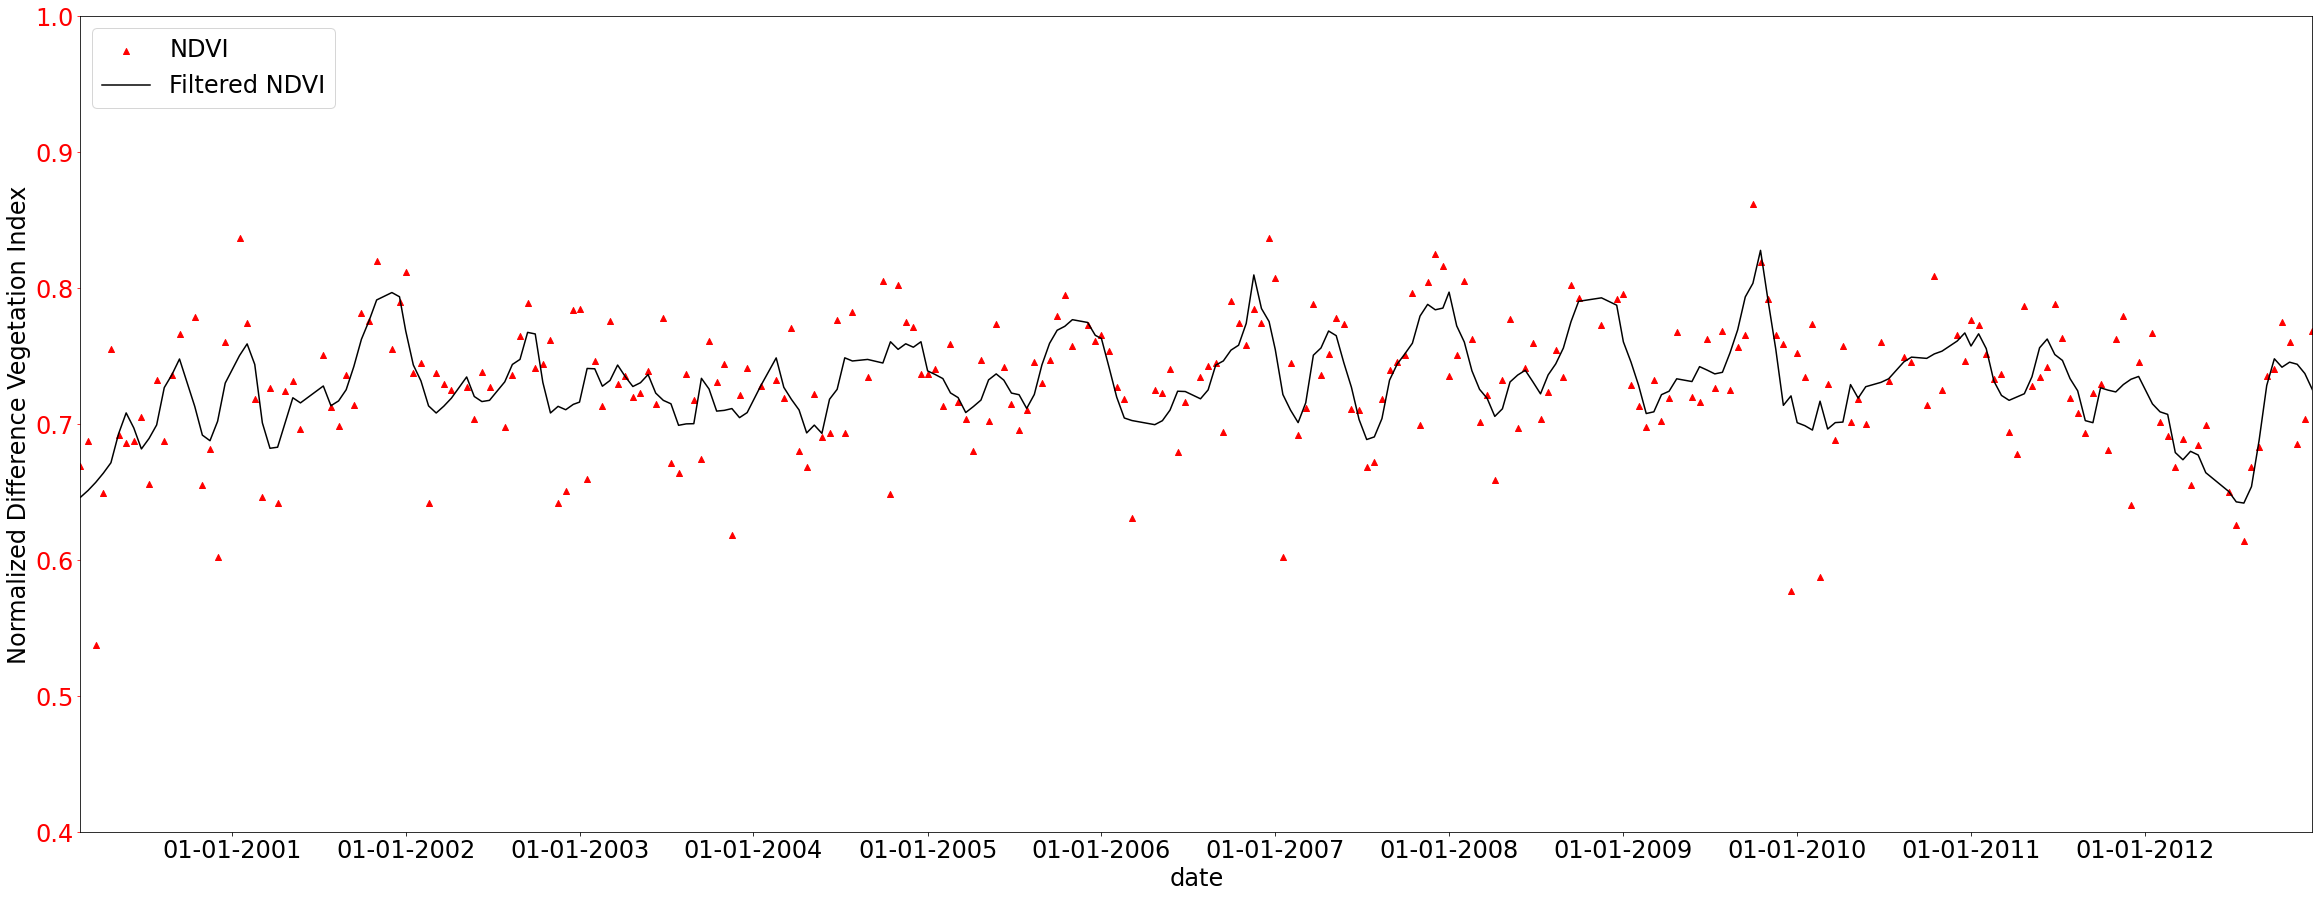

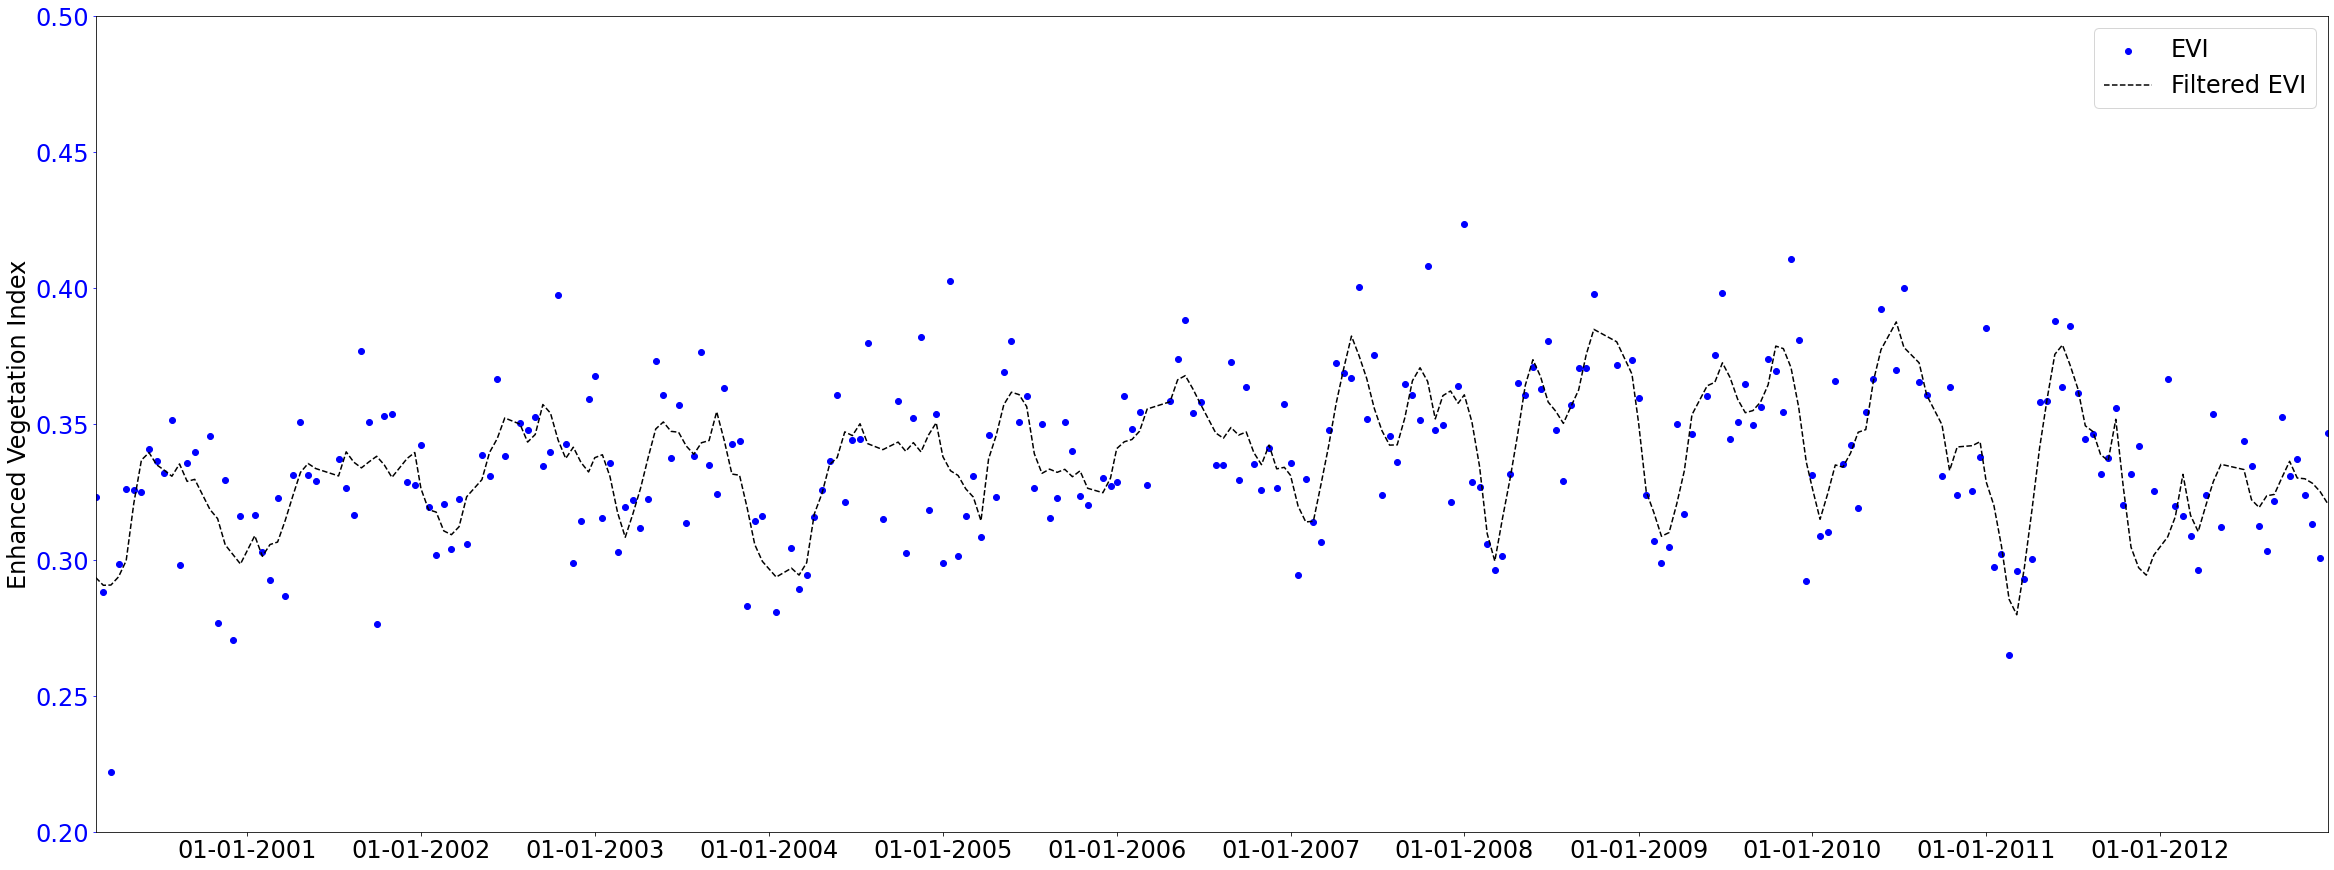

In [7]:
fig, ndvi = plt.subplots()

ndvi.scatter(df['date'], df['mean'], color = 'red', marker ='^', label = 'NDVI' )
ndvi.plot(df['date'], ndvisg, color = 'black', label = 'Filtered NDVI')

# set x-label 
ndvi.set_xlabel('date')
ndvi.tick_params('x', labelsize =24)
ndvi.tick_params('y', colors = 'red', labelsize =24)
# set primary y label
ndvi.set_ylabel('Normalized Difference Vegetation Index')
ndvi.set_ylim(0.4,1)
# define the plot for the secondary y

# set x-axis limits as the min and max of the series
ndvi.set_xlim(date2num([df['date'].min(), df['date'].max()]))
ndvi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ndvi.xaxis.set_major_locator(mdates.YearLocator(month=1, day=1))


 ##~
ndvi.legend(loc = 'upper left')
plt.show() ##~

# twin the x and plot evi on the twined x
#evi = ndvi.twinx()

fig, evi = plt.subplots()

evi.scatter(df1['date'], df1['mean'], color = 'blue', marker ='o', label = 'EVI')
evi.plot(df1['date'], evisg, color = 'black', ls = '--', label = 'Filtered EVI' )

evi.set_ylabel('Enhanced Vegetation Index')
evi.set_ylim(0.2,.5)
evi.tick_params('y', colors = 'blue', labelsize =24)

evi.set_xlim(date2num([df['date'].min(), df['date'].max()]))
evi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
evi.xaxis.set_major_locator(mdates.YearLocator(month=1, day=1))
evi.legend(loc = 'upper right')

plt.show() ##~

In [8]:
df = df.set_index('date')
df1 = df1.set_index('date')


In [9]:
df_year = df.index.year # Extract the year from the DF index
df.insert(0, 'Year', df_year) # Add the year as the first column

df1_year = df1.index.year # Extract the year from the DF index
df1.insert(0, 'Year', df_year) # Add the year as the first column

In [10]:
df['NDVI_SG_FILT'] = ndvisg
df1['EVI_SG_FILT'] = evisg

df_gs = df[['NDVI_SG_FILT','Year']] # select only EVI and Year for 20th percentile calc
df_g_max = df_gs.groupby('Year').max() # Determine the max value in each year
df_g_min = df_gs.groupby('Year').min() # Determine the min value in each year


df_amp_join = df_g_max.join(df_g_min, 'Year', lsuffix ='Year' ) #  join the max and min df 


df_amp_join.rename(columns = {'NDVI_SG_FILTYear':'NDVI_SG_FILT_MAX','NDVI_SG_FILT': 'NDVI_SG_FILT_MIN'}, inplace = True) # rename columns 

df_amp_join

df_amp = df_amp_join # rename df 

df_amp['NDVI_AMPLITUDE'] = df_amp['NDVI_SG_FILT_MAX'] - df_amp['NDVI_SG_FILT_MIN'] # calculate the amplitude of the yearly gpp change
df_amp['NDVI_20th'] = df_amp['NDVI_AMPLITUDE'].mul(.20) # determine the 20th percentile from the amplitude
df_amp['NDVI_MINCORRECTED_20th'] = df_amp['NDVI_SG_FILT_MIN'] + df_amp['NDVI_20th'] # correct the 20th percentile for the min

#df_amp

In [11]:
df = df.join(df_amp, 'Year', how = 'left', lsuffix = 'Year') # join the two dataframes to include the max and 20th percentile

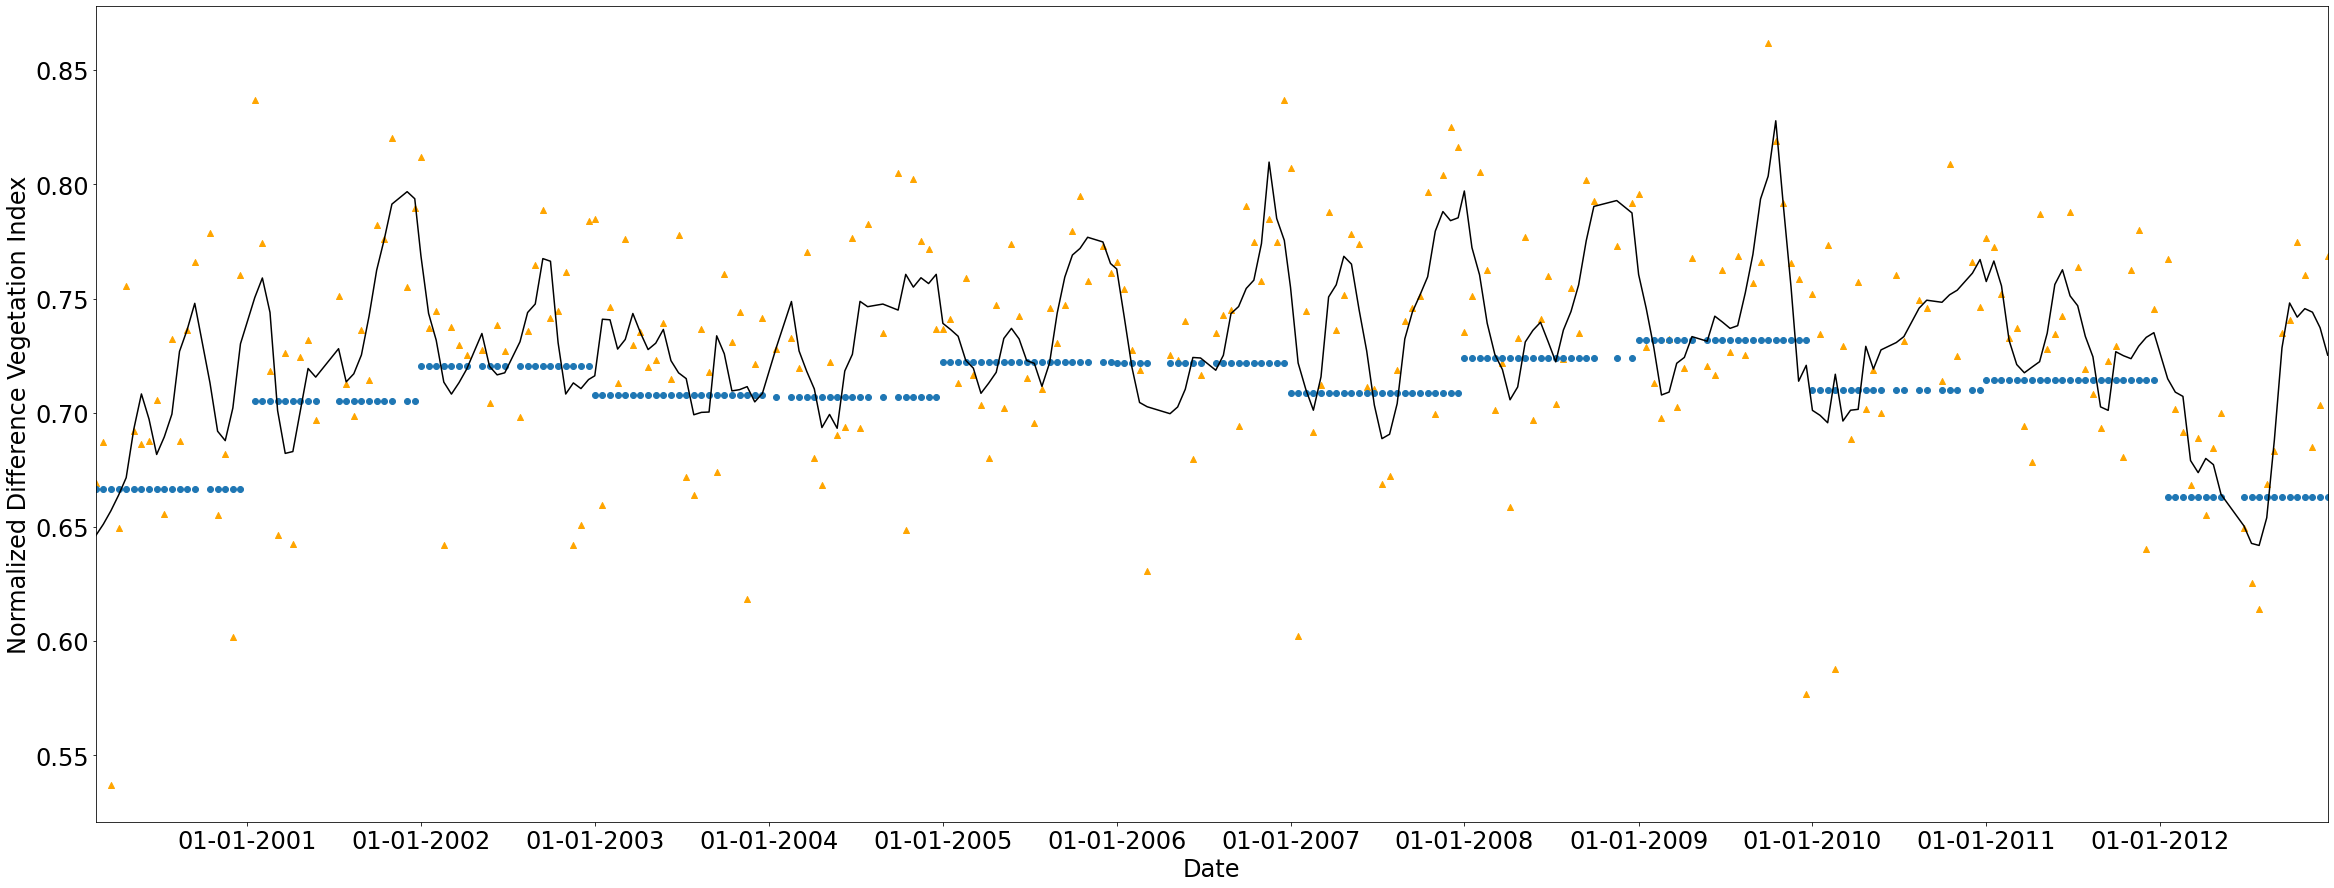

In [12]:
fig, ndvi = plt.subplots()

ndvi.scatter(df.index, df['mean'], color = 'orange', marker ='^')

# set x-label 
ndvi.set_xlabel('Date')
ndvi.tick_params('x', labelsize =24)

# set primary y label
ndvi.set_ylabel('Normalized Difference Vegetation Index')

# define the plot for the secondary y

# set x-axis limits as the min and max of the series
ndvi.set_xlim(date2num([df.index.min(), df.index.max()]))
ndvi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ndvi.xaxis.set_major_locator(mdates.YearLocator(month=1, day=1))

# plot the savitsky-golay flter

ndvi.plot(df.index, ndvisg, color = 'black')
ndvi.scatter(df.index, df['NDVI_MINCORRECTED_20th'])

plt.show()

In [25]:
# check if GPP_SG_FILT is less then Min_Corrected_Annual_20th%

# define a function which checks the value of the filtered SG value against the annual min corrected 20th percentile.
# if the value is less than the 20th% than FALSE, if greater it is TRUE
def check_df(df):
    if (df['NDVI_SG_FILT'] < (df['NDVI_MINCORRECTED_20th'])):
        return 0
    elif (df['NDVI_SG_FILT'] > (df['NDVI_MINCORRECTED_20th'])):
        return 1
    else:
        return np.nan


######
    
df['BoolCheck'] = df.apply(check_df, axis=1) # apply the function to the dataframe

######

# create another column which checks if the values in 'BoolCheck' change between rows.
# if they do than True, if they dont than false
df['changes'] = df["BoolCheck"].shift() != df["BoolCheck"] 

ndviSC = df.loc[df['changes'] == True] # create a new df that only has values of change 

#######

ndviSOS2 = ndviSC.loc[ndviSC['BoolCheck'] == 1] # filter for all the instances where the change goes from false to true, SOS

ndviEOS2 = ndviSC.loc[ndviSC['BoolCheck'] == 0] # Now filter for all the instances where the change is from true to false, EOS

#print(ndviSOS2,ndviEOS2)

In [14]:


ndviSOS1 = ndviSOS2[['NDVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns
ndviEOS1 = ndviEOS2[['NDVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns 

#EOS = EOS1.set_index('date')
#SOS = SOS1.set_index('date')

nSOS = ndviSOS1.drop(['2002-07-28','2003-09-14','2003-12-19','2005-08-29','2006-08-13','2007-08-29','2008-07-27',
                      '2009-06-10','2010-04-23','2011-09-30','2012-08-28','2004-06-09','2006-06-10'])
nEOS = ndviEOS1.drop(['2000-02-18', '2001-03-06','2002-02-18','2002-06-10','2003-07-28','2004-04-22','2005-03-06',
                      '2006-02-02','2007-02-18','2008-03-21','2009-02-02','2009-05-25','2010-03-06','2012-06-25',
                      '2005-07-12','2006-07-28','2007-06-26','2008-07-11','2011-08-29'])

print(nSOS,nEOS)

            NDVI_SG_FILT  BoolCheck  changes
date                                        
2000-04-22      0.671552          1     True
2001-05-09      0.719370          1     True
2002-05-09      0.734697          1     True
2003-01-01      0.716174          1     True
2005-05-09      0.732532          1     True
2007-03-06      0.715701          1     True
2008-05-08      0.731000          1     True
2009-04-23      0.733332          1     True
2010-02-18      0.716859          1     True             NDVI_SG_FILT  BoolCheck  changes
date                                        
2002-11-01      0.708192          0     True
2003-12-03      0.704755          0     True
2009-12-03      0.713815          0     True


In [15]:
#print(nSOS)
#print(nEOS)

In [16]:
nSOS = nSOS.reset_index()
nEOS = nEOS.reset_index()

print(nEOS, nSOS)

#Season = nSOS.join(nEOS, nSOS.index, lsuffix = 'date')


#Season = Season[['datedate','date']]

#Season['DateDelta'] = Season['date'] - Season['datedate']

#Season.rename(columns = {'datedate':'SOS_Date', 'date':'EOS_Date'})

        date  NDVI_SG_FILT  BoolCheck  changes
0 2002-11-01      0.708192          0     True
1 2003-12-03      0.704755          0     True
2 2009-12-03      0.713815          0     True         date  NDVI_SG_FILT  BoolCheck  changes
0 2000-04-22      0.671552          1     True
1 2001-05-09      0.719370          1     True
2 2002-05-09      0.734697          1     True
3 2003-01-01      0.716174          1     True
4 2005-05-09      0.732532          1     True
5 2007-03-06      0.715701          1     True
6 2008-05-08      0.731000          1     True
7 2009-04-23      0.733332          1     True
8 2010-02-18      0.716859          1     True


In [17]:
## - EVI CALC -##

In [18]:
df1_gs = df1[['EVI_SG_FILT','Year']] # select only EVI and Year for 20th percentile calc
df1_g_max = df1_gs.groupby('Year').max() # Determine the max value in each year
df1_g_min = df1_gs.groupby('Year').min() # Determine the min value in each year


df1_amp_join = df1_g_max.join(df1_g_min, 'Year', lsuffix ='Year' ) #  join the max and min df 


df1_amp_join.rename(columns = {'EVI_SG_FILTYear':'EVI_SG_FILT_MAX','EVI_SG_FILT': 'EVI_SG_FILT_MIN'}, inplace = True) # rename columns 

df1_amp_join

df1_amp = df1_amp_join # rename df 

df1_amp['EVI_AMPLITUDE'] = df1_amp['EVI_SG_FILT_MAX'] - df1_amp['EVI_SG_FILT_MIN'] # calculate the amplitude of the yearly gpp change
df1_amp['EVI_20th'] = df1_amp['EVI_AMPLITUDE'].mul(.20) # determine the 20th percentile from the amplitude
df1_amp['EVI_MINCORRECTED_20th'] = df1_amp['EVI_SG_FILT_MIN'] + df1_amp['EVI_20th'] # correct the 20th percentile for the min

#df_amp

In [19]:
df1 = df1.join(df1_amp, 'Year', how = 'left', lsuffix = 'Year') # join the two dataframes to include the max and 20th percentile

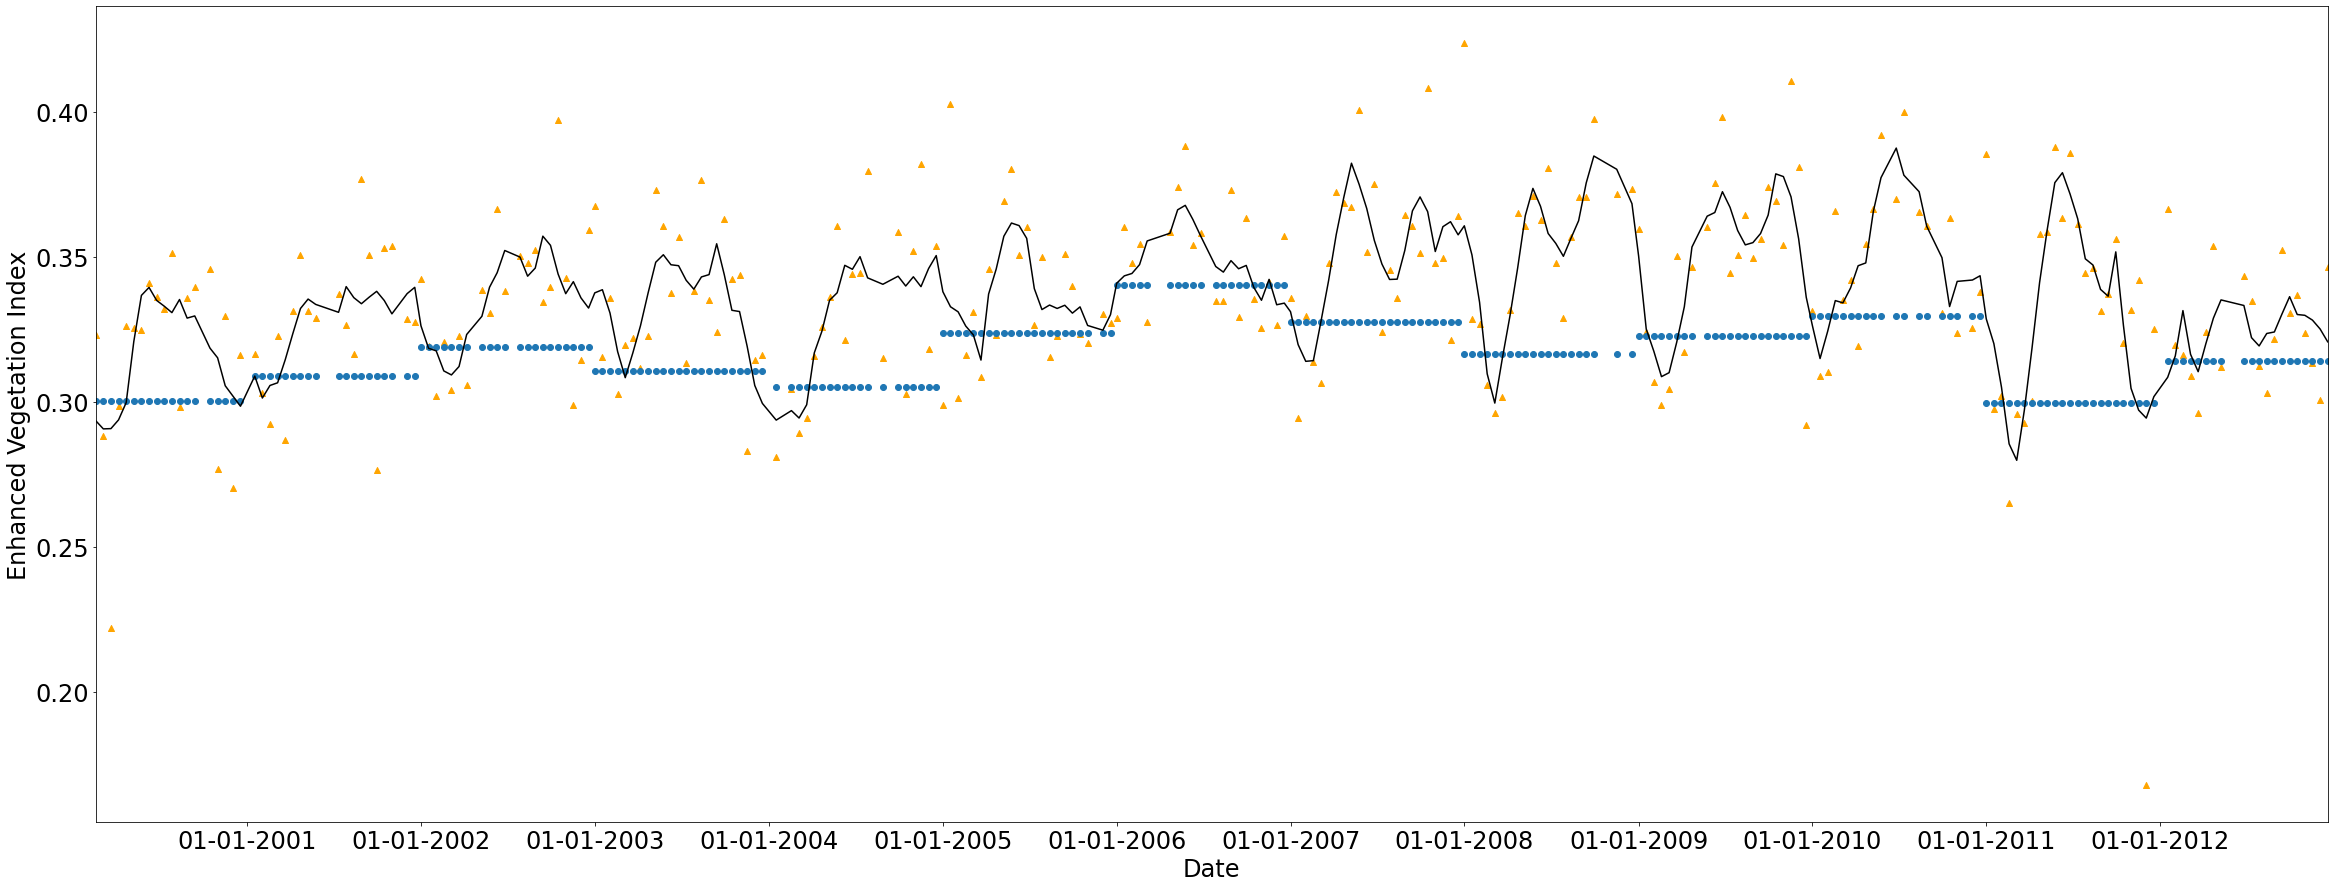

In [20]:
fig, evi = plt.subplots()

evi.scatter(df1.index, df1['mean'], color = 'orange', marker ='^')

# set x-label 
evi.set_xlabel('Date')
evi.tick_params('x', labelsize =24)

# set primary y label
evi.set_ylabel('Enhanced Vegetation Index')

# define the plot for the secondary y

# set x-axis limits as the min and max of the series
evi.set_xlim(date2num([df.index.min(), df.index.max()]))
evi.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
evi.xaxis.set_major_locator(mdates.YearLocator(month=1, day=1))

# plot the savitsky-golay flter

evi.plot(df1.index, evisg, color = 'black')
evi.scatter(df1.index, df1['EVI_MINCORRECTED_20th'])

plt.show()

In [21]:
# check if GPP_SG_FILT is less then Min_Corrected_Annual_20th%

# define a function which checks the value of the filtered SG value against the annual min corrected 20th percentile.
# if the value is less than the 20th% than FALSE, if greater it is TRUE
def check_df(df1):
    if (df1['EVI_SG_FILT'] < (df1['EVI_MINCORRECTED_20th'])):
        return 0
    elif (df1['EVI_SG_FILT'] > (df1['EVI_MINCORRECTED_20th'])):
        return 1
    else:
        return np.nan


######
    
df1['BoolCheck'] = df1.apply(check_df, axis=1) # apply the function to the dataframe

######

# create another column which checks if the values in 'BoolCheck' change between rows.
# if they do than True, if they dont than false
df1['changes'] = df1["BoolCheck"].shift() != df1["BoolCheck"] 

eviSC = df1.loc[df1['changes'] == True] # create a new df that only has values of change 

#######

eviSOS2 = eviSC.loc[eviSC['BoolCheck'] == 1] # filter for all the instances where the change goes from false to true, SOS

eviEOS2 = eviSC.loc[eviSC['BoolCheck'] == 0] # Now filter for all the instances where the change is from true to false, EOS

#print(eviSOS2,eviEOS2)

            Year    mean  per_cent_pixels_pass_qa  EVI_SG_FILT  \
date                                                             
2000-05-08  2000  0.3256                    70.37     0.320822   
2001-03-22  2001  0.2869                    80.25     0.314565   
2002-04-07  2002  0.3058                    80.25     0.323267   
2003-03-22  2003  0.3222                    70.37     0.316951   
2004-04-06  2004  0.3160                    70.37     0.316940   
2005-04-07  2005  0.3460                    85.19     0.337210   
2006-11-17  2006  0.3413                    77.78     0.342288   
2007-01-01  2007  0.3358                    77.78     0.331139   
2007-03-06  2007  0.3065                   100.00     0.327825   
2008-04-06  2008  0.3316                    80.25     0.329835   
2009-04-07  2009  0.3171                    90.12     0.332860   
2010-02-18  2010  0.3660                    82.72     0.334968   
2011-04-07  2011  0.3004                    80.25     0.318449   
2011-12-19

In [22]:
eviSOS1 = eviSOS2[['EVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns
eviEOS1 = eviEOS2[['EVI_SG_FILT','BoolCheck', 'changes']] # only select relevant columns 

eviSOS = eviSOS1.drop(['2006-11-17', '2011-12-19', '2012-04-06'])
eviEOS = eviEOS1.drop(['2000-02-18', '2003-03-06','2002-01-17 ','2005-03-06', '2006-10-16', '2007-01-17',
                      '2008-02-18 ', '2009-02-02','2010-01-01','2011-02-18','2012-01-17','2012-03-21'])

print(eviSOS, eviEOS)

            EVI_SG_FILT  BoolCheck  changes
date                                       
2000-05-08     0.320822          1     True
2001-03-22     0.314565          1     True
2002-04-07     0.323267          1     True
2003-03-22     0.316951          1     True
2004-04-06     0.316940          1     True
2005-04-07     0.337210          1     True
2007-01-01     0.331139          1     True
2007-03-06     0.327825          1     True
2008-04-06     0.329835          1     True
2009-04-07     0.332860          1     True
2010-02-18     0.334968          1     True
2011-04-07     0.318449          1     True
2012-02-02     0.315910          1     True             EVI_SG_FILT  BoolCheck  changes
date                                       
2000-12-18     0.298518          0     True
2003-12-03     0.305669          0     True
2006-12-03     0.333534          0     True
2011-11-17     0.297169          0     True


In [23]:
#Season.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\NDVI_Phenology.csv')
ndviSOS1.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD13Q1_25pixel\MOD13_NDVI_SOS.csv')
ndviEOS1.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD13Q1_25pixel\MOD13_NDVI_EOS.csv')

In [24]:
eviSOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD13Q1_25pixel\MOD13_EVI_SOS.csv')
eviEOS.to_csv(r'C:\Users\Giorgio\Desktop\Dissertation_Main\Disseration\Data\Processed_Data\MOD13Q1_25pixel\MOD13_EVI_EOS.csv')